# Download dataset from Kaggle
Dataset is available on Kaggle 
https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

In [ ]:
# Import dataset from kaggle
# Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "rasharp" # username from the json file
os.environ['KAGGLE_KEY'] = "9b9b966dc32e7dc85ec201995ad8daf6" # key from the json file

In [ ]:
! kaggle datasets download -d ankurzing/sentiment-analysis-for-financial-news

  0% 0.00/903k [00:00<?, ?B/s]
100% 903k/903k [00:00<00:00, 58.8MB/s]


In [ ]:
! unzip sentiment-analysis-for-financial-news.zip

Archive:  sentiment-analysis-for-financial-news.zip
  inflating: FinancialPhraseBank/License.txt  
  inflating: FinancialPhraseBank/README.txt  
  inflating: FinancialPhraseBank/Sentences_50Agree.txt  
  inflating: FinancialPhraseBank/Sentences_66Agree.txt  
  inflating: FinancialPhraseBank/Sentences_75Agree.txt  
  inflating: FinancialPhraseBank/Sentences_AllAgree.txt  
  inflating: all-data.csv            


In [ ]:
import pandas as pd

In [ ]:
labels = []
corpus = []
label2num = {'negative': 0, 'neutral': 1, 'positive': 2}

with open('all-data.csv', encoding = "ISO-8859-1") as f:
  for line in f:
    label, text = line.split(',', maxsplit=1)
    labels.append(label2num[label])
    corpus.append(text)

# Download from GitHub

In [1]:
! wget https://github.com/rasharp/LSML-FinalProject/blob/main/data/all-data.csv

--2021-09-05 19:26:49--  https://github.com/rasharp/LSML-FinalProject/blob/main/data/all-data.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘all-data.csv.2’

all-data.csv.2          [ <=>                ] 816.05K  --.-KB/s    in 0.04s   

2021-09-05 19:26:49 (19.7 MB/s) - ‘all-data.csv.2’ saved [835634]



In [2]:
labels = []
corpus = []
label2num = {'negative': 0, 'neutral': 1, 'positive': 2}

with open('all-data.csv', encoding = "ISO-8859-1") as f:
  for line in f:
    label, text = line.split(',', maxsplit=1)
    labels.append(label2num[label])
    corpus.append(text)

In [3]:
import matplotlib.pyplot as plt

(array([  82.,  625., 1081., 1013.,  773.,  538.,  390.,  222.,   90.,
          32.]),
 array([ 10. ,  40.8,  71.6, 102.4, 133.2, 164. , 194.8, 225.6, 256.4,
        287.2, 318. ]),
 <a list of 10 Patch objects>)

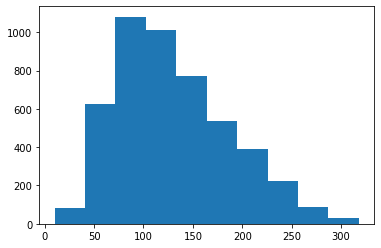

In [4]:
# max len of the news
news_len = [len(s) for s in corpus]

plt.hist(news_len)

# Preprocessing

In [5]:
import torch

In [ ]:
! pip install transformers

     |████████████████████████████████| 2.8 MB 9.1 MB/s 
     |████████████████████████████████| 636 kB 73.1 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 895 kB 70.3 MB/s 
     |████████████████████████████████| 3.3 MB 42.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [7]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for text in corpus:
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation = True,
                        max_length = 300,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [8]:
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# TEST. Print sentence 0, now as a list of IDs.
print('Original: ', corpus[0])
print('Token IDs:', input_ids[0])
print('Attention mask:', attention_masks[0])

Original:  "According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."

Token IDs: tensor([  101,  1000,  2429,  2000, 12604,  1010,  1996,  2194,  2038,  2053,
         3488,  2000,  2693,  2035,  2537,  2000,  3607,  1010,  2348,  2008,
         2003,  2073,  1996,  2194,  2003,  3652,  1012,  1000,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,    

In [9]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)


# Create a 90-10 train-validation split.
# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

4,361 training samples
  485 validation samples


In [10]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

# Fine-Tune BERT

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np
import random
import tqdm

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
device = "cuda"

In [ ]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# For each epoch...
for epoch_i in range(0, epochs):
    # ============= Training ====================
    # Perform one full pass over the training set.
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for batch in tqdm.notebook.tqdm(train_dataloader):

        # Unpack this training batch from our dataloader. 
        # batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        res = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss = res['loss']
        logits = res['logits']

        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
        
    # =============== Validation =============
    print("Running Validation...")
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            res = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = res['loss']
            logits = res['logits']
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy        }
    )

======== Epoch 1 / 4 ========


  0%|          | 0/137 [00:00<?, ?it/s]

Running Validation...
  Accuracy: 0.84
  Validation Loss: 0.40
======== Epoch 2 / 4 ========


  0%|          | 0/137 [00:00<?, ?it/s]

Running Validation...
  Accuracy: 0.87
  Validation Loss: 0.35
======== Epoch 3 / 4 ========


  0%|          | 0/137 [00:00<?, ?it/s]

Running Validation...
  Accuracy: 0.85
  Validation Loss: 0.40
======== Epoch 4 / 4 ========


  0%|          | 0/137 [00:00<?, ?it/s]

Running Validation...
  Accuracy: 0.85
  Validation Loss: 0.42


In [ ]:
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.
epoch,,,
1,0.67,0.40,0.84
2,0.32,0.35,0.87
3,0.20,0.40,0.85
4,0.12,0.42,0.85


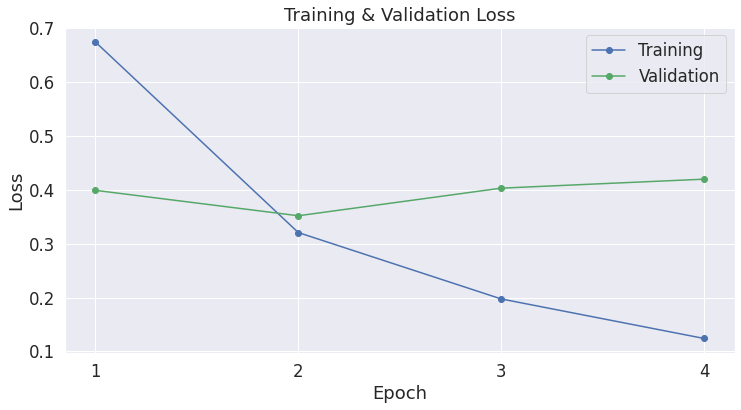

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

# Save model

In [ ]:
with open("bert-model.bin", 'wb') as f:
  torch.save(model, f)

# Compare with VADER

In [11]:
# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
vader = SentimentIntensityAnalyzer()

In [14]:
# VADER accuracy on corpus
lab2num = {'pos': 2, 'neg': 0, 'neu': 1}
acc = 0
for label, text in zip(labels, corpus):
  scores = vader.polarity_scores(text)
  max_score = max(list([('neg', scores['neg']), ('pos', scores['pos']), ('neu', scores['neu'])]), 
                  key=lambda x: x[1])
  acc += int(lab2num[max_score[0]] == label)

print("NLTK Vader accuracy ", acc / len(labels))

NLTK Vader accuracy  0.5943045810978126
